In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/FYP/extracted_dataset.csv')

print("Dataset Overview:")
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print("\nFirst few rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

print("\nBasic Statistics:")
print(df.describe())

# Check target distribution if label column exists
if 'label' in df.columns:
    print("\nTarget Distribution:")
    print(df['label'].value_counts())

    plt.figure(figsize=(8, 5))
    df['label'].value_counts().plot(kind='bar')
    plt.title('Distribution of Attack vs Normal Traffic')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Identify data types
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"\nNumerical columns ({len(numerical_cols)}): {numerical_cols}")
print(f"Categorical columns ({len(categorical_cols)}): {categorical_cols}")


Mounted at /content/drive
Dataset Overview:
Shape: (2500, 38)
Columns: ['uid', 'ts', 'id.orig_h', 'id.resp_h', 'service', 'flow_duration', 'fwd_pkts_tot', 'bwd_pkts_tot', 'fwd_data_pkts_tot', 'bwd_data_pkts_tot', 'fwd_pkts_per_sec', 'bwd_pkts_per_sec', 'flow_pkts_per_sec', 'down_up_ratio', 'fwd_header_size_tot', 'fwd_header_size_min', 'fwd_header_size_max', 'bwd_header_size_tot', 'bwd_header_size_min', 'bwd_header_size_max', 'flow_FIN_flag_count', 'flow_SYN_flag_count', 'flow_RST_flag_count', 'fwd_PSH_flag_count', 'bwd_PSH_flag_count', 'flow_ACK_flag_count', 'fwd_URG_flag_count', 'bwd_URG_flag_count', 'flow_CWR_flag_count', 'flow_ECE_flag_count', 'payload_bytes_per_second', 'fwd_init_window_size', 'bwd_init_window_size', 'fwd_last_window_size', 'bwd_last_window_size', 'traffic_direction', 'attack', 'attack_type']

First few rows:
                    uid       ts        id.orig_h        id.resp_h service  \
0  b_CfXdFr3sW9WsL5f6uf  17:29.1  192.168.100.115  192.168.100.209     dns   
1 

Dataset Overview:
Shape: (2500, 38)
Columns: ['uid', 'ts', 'id.orig_h', 'id.resp_h', 'service', 'flow_duration', 'fwd_pkts_tot', 'bwd_pkts_tot', 'fwd_data_pkts_tot', 'bwd_data_pkts_tot', 'fwd_pkts_per_sec', 'bwd_pkts_per_sec', 'flow_pkts_per_sec', 'down_up_ratio', 'fwd_header_size_tot', 'fwd_header_size_min', 'fwd_header_size_max', 'bwd_header_size_tot', 'bwd_header_size_min', 'bwd_header_size_max', 'flow_FIN_flag_count', 'flow_SYN_flag_count', 'flow_RST_flag_count', 'fwd_PSH_flag_count', 'bwd_PSH_flag_count', 'flow_ACK_flag_count', 'fwd_URG_flag_count', 'bwd_URG_flag_count', 'flow_CWR_flag_count', 'flow_ECE_flag_count', 'payload_bytes_per_second', 'fwd_init_window_size', 'bwd_init_window_size', 'fwd_last_window_size', 'bwd_last_window_size', 'traffic_direction', 'attack', 'attack_type']

First few rows:
                    uid       ts        id.orig_h        id.resp_h service  \
0  b_CfXdFr3sW9WsL5f6uf  17:29.1  192.168.100.115  192.168.100.209     dns   
1  b_CL7sGY2RVAyREp3Am4  17:

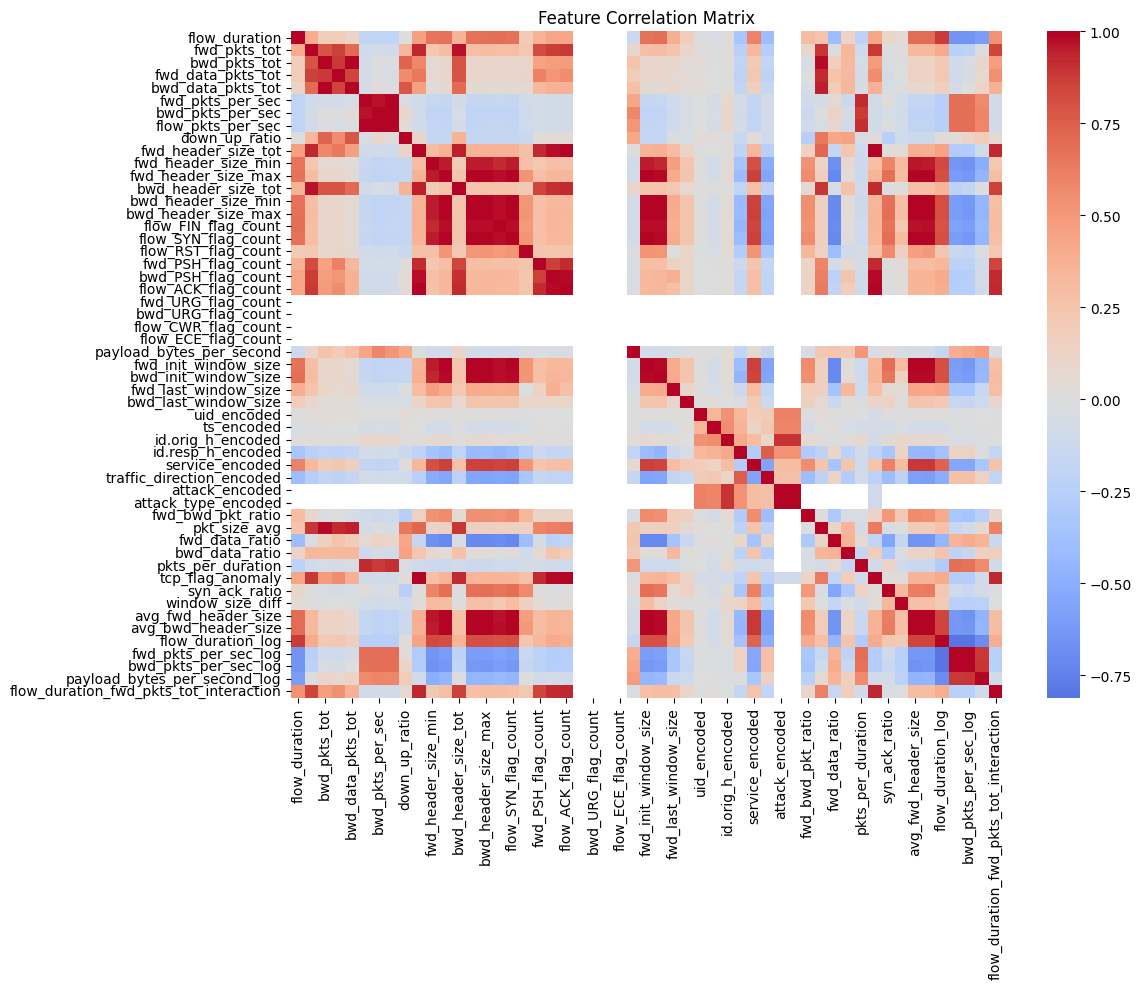


Highly correlated feature pairs (|r| > 0.8): 116
flow_duration - flow_duration_log: 0.879
fwd_pkts_tot - fwd_data_pkts_tot: 0.864
fwd_pkts_tot - fwd_header_size_tot: 0.936
fwd_pkts_tot - bwd_header_size_tot: 0.969
fwd_pkts_tot - fwd_PSH_flag_count: 0.822
fwd_pkts_tot - bwd_PSH_flag_count: 0.868
fwd_pkts_tot - flow_ACK_flag_count: 0.882
fwd_pkts_tot - pkt_size_avg: 0.893
fwd_pkts_tot - tcp_flag_anomaly: 0.882
fwd_pkts_tot - flow_duration_fwd_pkts_tot_interaction: 0.850

FEATURE SELECTION
Using 'attack' as target variable
1. Statistical Feature Selection (Top 20 features):
                         feature         score
11           attack_type_encoded           inf
10                attack_encoded           inf
7              id.orig_h_encoded  1.017313e+04
19  payload_bytes_per_second_log  7.018737e+03
14                bwd_data_ratio  5.910444e+03
13                fwd_data_ratio  3.032575e+03
0                  down_up_ratio  2.940311e+03
5                    uid_encoded  1.500300e+0

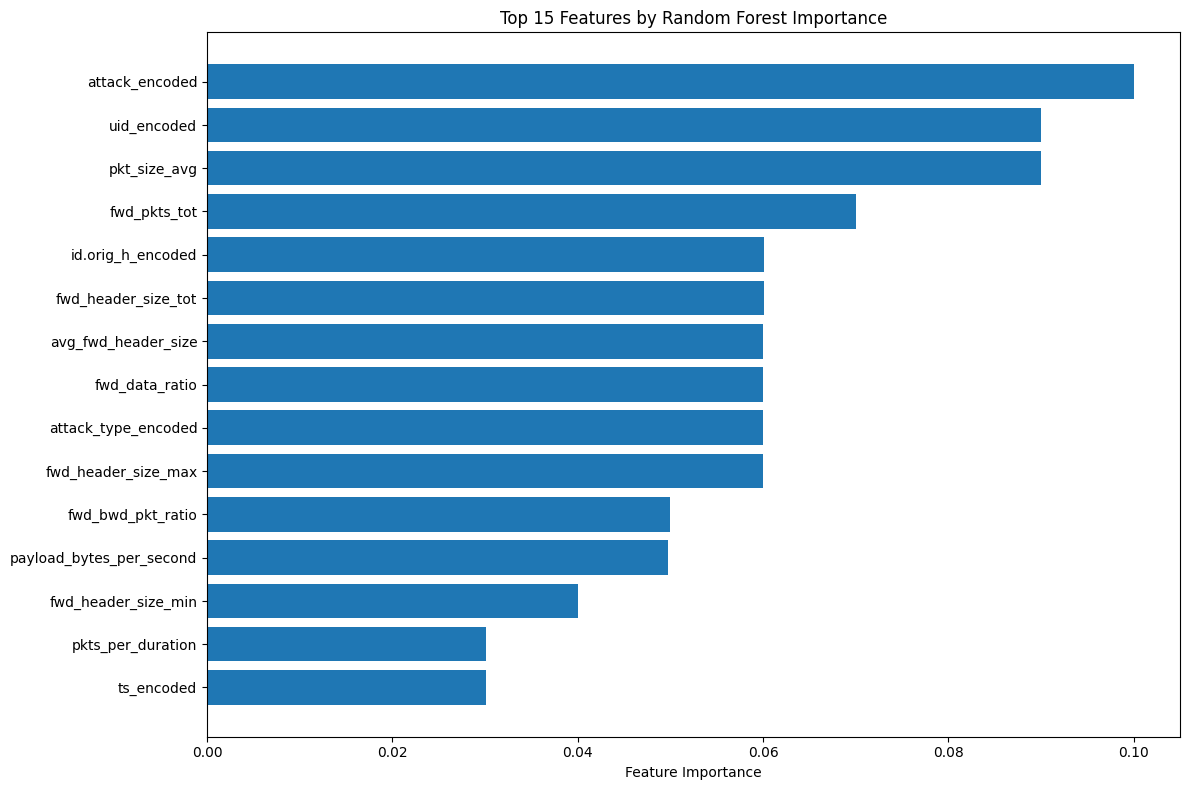


RECOMMENDED FEATURES
Recommended features (22):
 1. fwd_pkts_per_sec_log
 2. fwd_header_size_min
 3. payload_bytes_per_second
 4. fwd_header_size_max
 5. pkt_size_avg
 6. down_up_ratio
 7. bwd_pkts_per_sec_log
 8. pkts_per_duration
 9. bwd_data_ratio
10. fwd_data_ratio
11. payload_bytes_per_second_log
12. fwd_pkts_tot
13. id.resp_h_encoded
14. avg_fwd_header_size
15. attack_encoded
16. ts_encoded
17. fwd_header_size_tot
18. bwd_header_size_min
19. uid_encoded
20. id.orig_h_encoded
21. fwd_bwd_pkt_ratio
22. attack_type_encoded

Final features after removing redundancy (16):
 1. fwd_pkts_per_sec_log
 2. fwd_header_size_min
 3. payload_bytes_per_second
 4. pkt_size_avg
 5. down_up_ratio
 6. pkts_per_duration
 7. bwd_data_ratio
 8. fwd_data_ratio
 9. payload_bytes_per_second_log
10. fwd_pkts_tot
11. id.resp_h_encoded
12. attack_encoded
13. ts_encoded
14. uid_encoded
15. id.orig_h_encoded
16. fwd_bwd_pkt_ratio

DATA QUALITY SUMMARY
Total samples: 2500
Total features after engineering: 61
M

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/FYP/extracted_dataset.csv')

print("Dataset Overview:")
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print("\nFirst few rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

print("\nBasic Statistics:")
print(df.describe())

# Check target distribution if label column exists
if 'label' in df.columns:
    print("\nTarget Distribution:")
    print(df['label'].value_counts())

    plt.figure(figsize=(8, 5))
    df['label'].value_counts().plot(kind='bar')
    plt.title('Distribution of Attack vs Normal Traffic')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Identify data types
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"\nNumerical columns ({len(numerical_cols)}): {numerical_cols}")
print(f"Categorical columns ({len(categorical_cols)}): {categorical_cols}")

# Feature Engineering
print("\n" + "="*50)
print("FEATURE ENGINEERING")
print("="*50)

df_engineered = df.copy()

# 1. Handle categorical variables
label_encoders = {}
for col in categorical_cols:
    if col != 'label':  # Don't encode target variable yet
        le = LabelEncoder()
        df_engineered[col + '_encoded'] = le.fit_transform(df_engineered[col].astype(str))
        label_encoders[col] = le

# 2. Create new features for network traffic analysis (WEB-IDS23 specific)
# Focus on discriminative features based on WEB-IDS23 documentation

# Packet flow ratios (key for attack detection)
if 'fwd_pkts_tot' in df.columns and 'bwd_pkts_tot' in df.columns:
    df_engineered['fwd_bwd_pkt_ratio'] = df_engineered['fwd_pkts_tot'] / (df_engineered['bwd_pkts_tot'] + 1)
    df_engineered['pkt_size_avg'] = (df_engineered['fwd_pkts_tot'] + df_engineered['bwd_pkts_tot']) / 2

# Data packet ratios (payload analysis)
if 'fwd_data_pkts_tot' in df.columns and 'fwd_pkts_tot' in df.columns:
    df_engineered['fwd_data_ratio'] = df_engineered['fwd_data_pkts_tot'] / (df_engineered['fwd_pkts_tot'] + 1)
if 'bwd_data_pkts_tot' in df.columns and 'bwd_pkts_tot' in df.columns:
    df_engineered['bwd_data_ratio'] = df_engineered['bwd_data_pkts_tot'] / (df_engineered['bwd_pkts_tot'] + 1)

# Flow timing patterns (DoS/brute force indicators)
if 'flow_duration' in df.columns and 'fwd_pkts_tot' in df.columns:
    df_engineered['pkts_per_duration'] = df_engineered['fwd_pkts_tot'] / (df_engineered['flow_duration'] + 0.001)

# TCP flag anomaly patterns (attack signatures)
tcp_flags = ['flow_FIN_flag_count', 'flow_SYN_flag_count', 'flow_RST_flag_count', 'flow_ACK_flag_count']
tcp_flag_cols = [col for col in tcp_flags if col in df.columns]
if tcp_flag_cols:
    df_engineered['tcp_flag_anomaly'] = df_engineered[tcp_flag_cols].sum(axis=1)
    df_engineered['syn_ack_ratio'] = df_engineered.get('flow_SYN_flag_count', 0) / (df_engineered.get('flow_ACK_flag_count', 0) + 1)

# Window size patterns (connection analysis)
if 'fwd_init_window_size' in df.columns and 'bwd_init_window_size' in df.columns:
    df_engineered['window_size_diff'] = abs(df_engineered['fwd_init_window_size'] - df_engineered['bwd_init_window_size'])

# Header size analysis (protocol anomalies)
if 'fwd_header_size_tot' in df.columns and 'fwd_pkts_tot' in df.columns:
    df_engineered['avg_fwd_header_size'] = df_engineered['fwd_header_size_tot'] / (df_engineered['fwd_pkts_tot'] + 1)
if 'bwd_header_size_tot' in df.columns and 'bwd_pkts_tot' in df.columns:
    df_engineered['avg_bwd_header_size'] = df_engineered['bwd_header_size_tot'] / (df_engineered['bwd_pkts_tot'] + 1)

# 3. Remove redundant statistical features - focus on discriminative ones only
# Only add statistical features for most important base features
key_features = ['flow_duration', 'fwd_pkts_per_sec', 'bwd_pkts_per_sec', 'payload_bytes_per_second']

for col in key_features:
    if col in df.columns:
        # Only log transformation for highly skewed data
        if df_engineered[col].skew() > 2:  # Only if highly skewed
            df_engineered[f'{col}_log'] = np.log1p(df_engineered[col])

# 4. Interaction features (if applicable)
if len(numerical_cols) >= 2:
    # Create interaction between first two numerical features
    col1, col2 = numerical_cols[0], numerical_cols[1]
    df_engineered[f'{col1}_{col2}_interaction'] = df_engineered[col1] * df_engineered[col2]

print(f"Original features: {df.shape[1]}")
print(f"After feature engineering: {df_engineered.shape[1]}")

# Correlation Analysis
print("\n" + "="*50)
print("CORRELATION ANALYSIS")
print("="*50)

# Select only numerical columns for correlation
numeric_df = df_engineered.select_dtypes(include=[np.number])

# Correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

# High correlation pairs
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.8:
            high_corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], corr_val))

print(f"\nHighly correlated feature pairs (|r| > 0.8): {len(high_corr_pairs)}")
for pair in high_corr_pairs[:10]:  # Show top 10
    print(f"{pair[0]} - {pair[1]}: {pair[2]:.3f}")

# Feature Selection
print("\n" + "="*50)
print("FEATURE SELECTION")
print("="*50)

# Check for different possible label columns based on WEB-IDS23 dataset
label_candidates = ['attack', 'Attack', 'attack_type', 'label']
target_col = None

for col in label_candidates:
    if col in df.columns:
        target_col = col
        break

if target_col:
    print(f"Using '{target_col}' as target variable")

    # For WEB-IDS23, convert to binary if needed
    if target_col in ['attack', 'Attack']:
        # Handle mixed data types in attack column
        if df[target_col].dtype == 'object':
            # Convert text labels to binary
            y = (df[target_col].str.lower() != 'benign').astype(int)
        else:
            y = df[target_col].astype(int)  # Already binary
    elif target_col == 'attack_type':
        # Convert multi-class to binary (benign=0, attacks=1)
        y = (df[target_col] != 'benign').astype(int)
    else:
        if df[target_col].dtype == 'object':
            le_target = LabelEncoder()
            y = le_target.fit_transform(df[target_col])
        else:
            y = df[target_col]

    # Prepare feature matrix (exclude label columns)
    exclude_cols = ['attack', 'Attack', 'attack_type', 'label', 'uid', 'ts', 'id.orig_h', 'id.resp_h']
    X_numeric = numeric_df.drop(columns=[col for col in exclude_cols if col in numeric_df.columns], errors='ignore')

    # 1. Statistical Feature Selection
    print("1. Statistical Feature Selection (Top 20 features):")

    # Handle NaN values
    X_numeric_clean = X_numeric.fillna(0)

    selector = SelectKBest(score_func=f_classif, k=min(20, X_numeric_clean.shape[1]))
    X_selected = selector.fit_transform(X_numeric_clean, y)
    selected_features = X_numeric_clean.columns[selector.get_support()]
    feature_scores = selector.scores_[selector.get_support()]

    feature_importance_df = pd.DataFrame({
        'feature': selected_features,
        'score': feature_scores
    }).sort_values('score', ascending=False)

    print(feature_importance_df.head(10))

    # 2. Random Forest Feature Importance
    print("\n2. Random Forest Feature Importance (Top 20 features):")
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_numeric_clean, y)

    rf_importance_df = pd.DataFrame({
        'feature': X_numeric.columns,
        'importance': rf.feature_importances_
    }).sort_values('importance', ascending=False)

    print(rf_importance_df.head(10))

    # Plot feature importance
    plt.figure(figsize=(12, 8))
    top_features = rf_importance_df.head(15)
    plt.barh(range(len(top_features)), top_features['importance'])
    plt.yticks(range(len(top_features)), top_features['feature'])
    plt.xlabel('Feature Importance')
    plt.title('Top 15 Features by Random Forest Importance')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

    # Final recommended features
    print("\n" + "="*50)
    print("RECOMMENDED FEATURES")
    print("="*50)

    # Combine top features from both methods
    stat_top = set(feature_importance_df.head(15)['feature'])
    rf_top = set(rf_importance_df.head(15)['feature'])
    recommended_features = list(stat_top.union(rf_top))

    print(f"Recommended features ({len(recommended_features)}):")
    for i, feature in enumerate(recommended_features, 1):
        print(f"{i:2d}. {feature}")

    # Remove highly correlated features from recommendations
    final_features = []
    corr_matrix_subset = correlation_matrix.loc[recommended_features, recommended_features]

    for feature in recommended_features:
        is_redundant = False
        for existing_feature in final_features:
            if abs(corr_matrix_subset.loc[feature, existing_feature]) > 0.9:
                is_redundant = True
                break
        if not is_redundant:
            final_features.append(feature)

    print(f"\nFinal features after removing redundancy ({len(final_features)}):")
    for i, feature in enumerate(final_features, 1):
        print(f"{i:2d}. {feature}")

else:
    print("No 'label' column found. Skipping supervised feature selection.")
    print("Available columns:", df.columns.tolist())

# Data Quality Summary
print("\n" + "="*50)
print("DATA QUALITY SUMMARY")
print("="*50)

print(f"Total samples: {len(df)}")
print(f"Total features after engineering: {df_engineered.shape[1]}")
print(f"Missing values: {df_engineered.isnull().sum().sum()}")
print(f"Duplicate rows: {df_engineered.duplicated().sum()}")

# Save engineered dataset
output_path = '/content/drive/MyDrive/FYP/engineered_dataset.csv'
df_engineered.to_csv(output_path, index=False)
print(f"\nEngineered dataset saved to: {output_path}")

# Save feature recommendations
if 'final_features' in locals():
    recommendations = {
        'recommended_features': recommended_features,
        'final_features': final_features,
        'feature_engineering_applied': [
            'URL length and parameter count',
            'Special character counts',
            'Suspicious keyword presence',
            'Statistical transformations (z-score, log)',
            'Interaction features'
        ]
    }

    import json
    with open('/content/drive/MyDrive/FYP/feature_recommendations.json', 'w') as f:
        json.dump(recommendations, f, indent=2)

    print("Feature recommendations saved to: /content/drive/MyDrive/FYP/feature_recommendations.json")

Using 16 selected features
Unique labels: attack
benign    2000
Name: count, dtype: int64
Normal traffic samples for training: 2000
Training samples: 1600
Validation samples: 400

ONE-CLASS SVM
One-Class SVM detected 32/400 outliers in normal validation data
Outlier rate: 8.00%

ISOLATION FOREST
Isolation Forest detected 29/400 outliers in normal validation data
Outlier rate: 7.25%

LOCAL OUTLIER FACTOR
LOF detected 26/400 outliers in normal validation data
Outlier rate: 6.50%

AUTOENCODER
Autoencoder detected 27/400 outliers in normal validation data
Outlier rate: 6.75%
Reconstruction error threshold: 0.744979


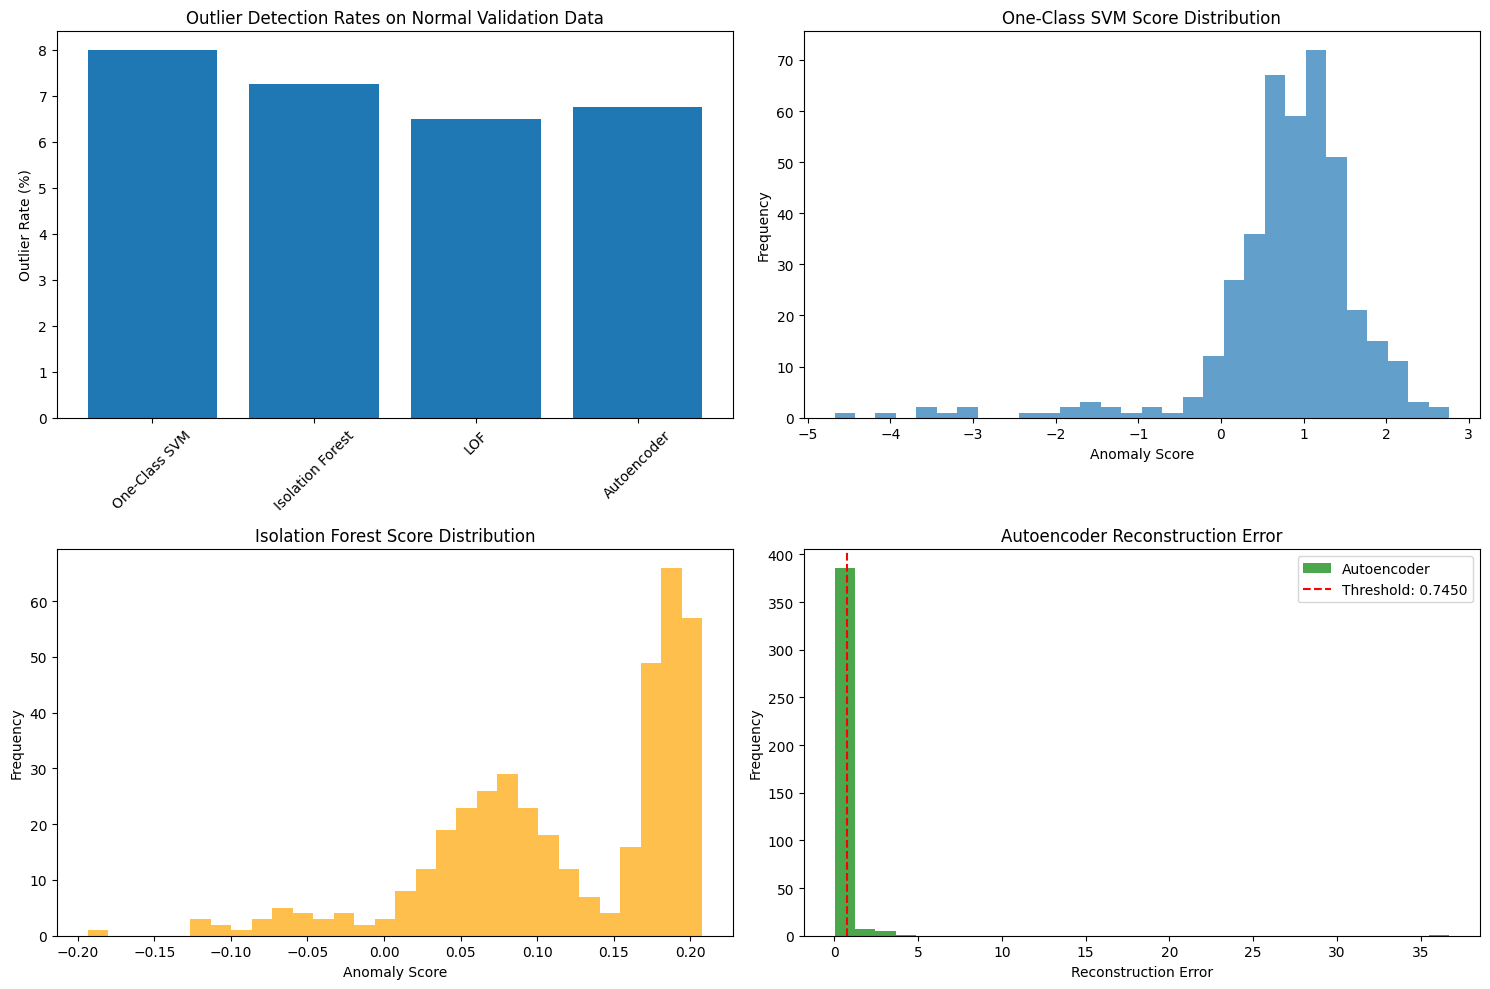

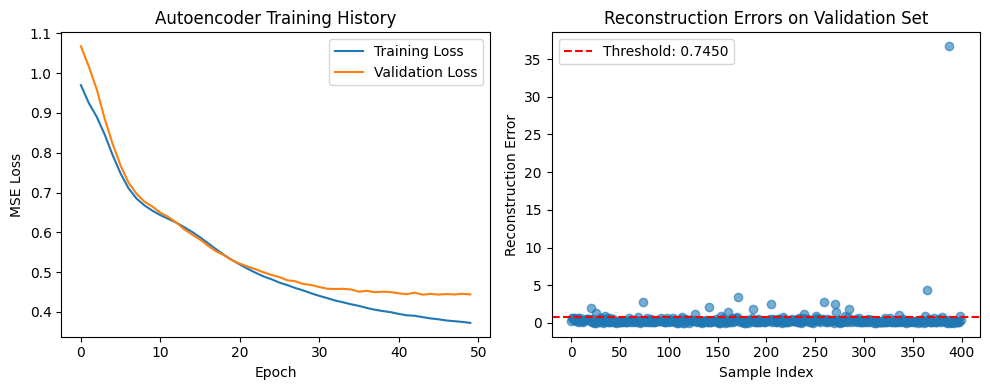


Models trained on 1600 normal samples
Ready for testing on mixed normal/attack datasets
Model parameters saved to: /content/drive/MyDrive/FYP/trained_models_params.json


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
import json

# Load data and feature recommendations
df = pd.read_csv('/content/drive/MyDrive/FYP/engineered_dataset.csv')
with open('/content/drive/MyDrive/FYP/feature_recommendations.json', 'r') as f:
    recommendations = json.load(f)
    final_features = recommendations['final_features']

print(f"Using {len(final_features)} selected features")

# Prepare data
X = df[final_features].fillna(0)

# Check for correct label column based on WEB-IDS23 dataset
if 'attack' in df.columns:
    y = df['attack']
elif 'Attack' in df.columns:
    y = df['Attack']
elif 'label' in df.columns:
    y = df['label']
else:
    y = df.iloc[:, -1]

# Check labels and identify normal traffic
print(f"Unique labels: {y.value_counts().head()}")

# For WEB-IDS23, benign traffic is labeled as 'benign' or 0
if y.dtype == 'object':
    normal_mask = y.str.lower() == 'benign'
else:
    normal_mask = y == 0

# Extract ONLY normal traffic for training
X_normal = X[normal_mask]
print(f"Normal traffic samples for training: {len(X_normal)}")

if len(X_normal) == 0:
    print("No benign traffic found. Using most common label as normal.")
    most_common_label = y.value_counts().index[0]
    X_normal = X[y == most_common_label]
    print(f"Using '{most_common_label}' as normal traffic: {len(X_normal)} samples")

# Split normal data for training/validation
X_train, X_val = train_test_split(X_normal, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

print(f"Training samples: {len(X_train_scaled)}")
print(f"Validation samples: {len(X_val_scaled)}")

# 1. One-Class SVM
print("\n" + "="*50)
print("ONE-CLASS SVM")
print("="*50)

oc_svm = OneClassSVM(kernel='rbf', gamma='scale', nu=0.05)
oc_svm.fit(X_train_scaled)

# Predict on validation set
svm_pred = oc_svm.predict(X_val_scaled)
svm_outliers = (svm_pred == -1).sum()
print(f"One-Class SVM detected {svm_outliers}/{len(X_val_scaled)} outliers in normal validation data")
print(f"Outlier rate: {svm_outliers/len(X_val_scaled)*100:.2f}%")

# 2. Isolation Forest
print("\n" + "="*50)
print("ISOLATION FOREST")
print("="*50)

iso_forest = IsolationForest(contamination=0.05, random_state=42)
iso_forest.fit(X_train_scaled)

iso_pred = iso_forest.predict(X_val_scaled)
iso_outliers = (iso_pred == -1).sum()
print(f"Isolation Forest detected {iso_outliers}/{len(X_val_scaled)} outliers in normal validation data")
print(f"Outlier rate: {iso_outliers/len(X_val_scaled)*100:.2f}%")

# 3. Local Outlier Factor
print("\n" + "="*50)
print("LOCAL OUTLIER FACTOR")
print("="*50)

lof = LocalOutlierFactor(contamination=0.05, novelty=True)
lof.fit(X_train_scaled)

lof_pred = lof.predict(X_val_scaled)
lof_outliers = (lof_pred == -1).sum()
print(f"LOF detected {lof_outliers}/{len(X_val_scaled)} outliers in normal validation data")
print(f"Outlier rate: {lof_outliers/len(X_val_scaled)*100:.2f}%")

# 4. Autoencoder
print("\n" + "="*50)
print("AUTOENCODER")
print("="*50)

# Build autoencoder
input_dim = X_train_scaled.shape[1]
encoding_dim = max(8, input_dim // 3)

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation='relu')(input_layer)
encoder = Dense(encoding_dim // 2, activation='relu')(encoder)
decoder = Dense(encoding_dim, activation='relu')(encoder)
decoder = Dense(input_dim, activation='linear')(decoder)

autoencoder = Model(input_layer, decoder)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train on normal data
history = autoencoder.fit(X_train_scaled, X_train_scaled,
                         epochs=50, batch_size=32, verbose=0,
                         validation_data=(X_val_scaled, X_val_scaled))

# Calculate reconstruction error
X_val_pred = autoencoder.predict(X_val_scaled, verbose=0)
val_mse = np.mean(np.power(X_val_scaled - X_val_pred, 2), axis=1)

# Set threshold (95th percentile of training reconstruction error)
X_train_pred = autoencoder.predict(X_train_scaled, verbose=0)
train_mse = np.mean(np.power(X_train_scaled - X_train_pred, 2), axis=1)
threshold = np.percentile(train_mse, 95)

ae_outliers = (val_mse > threshold).sum()
print(f"Autoencoder detected {ae_outliers}/{len(X_val_scaled)} outliers in normal validation data")
print(f"Outlier rate: {ae_outliers/len(X_val_scaled)*100:.2f}%")
print(f"Reconstruction error threshold: {threshold:.6f}")

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Outlier detection rates
models = ['One-Class SVM', 'Isolation Forest', 'LOF', 'Autoencoder']
outlier_rates = [svm_outliers/len(X_val_scaled)*100,
                iso_outliers/len(X_val_scaled)*100,
                lof_outliers/len(X_val_scaled)*100,
                ae_outliers/len(X_val_scaled)*100]

axes[0, 0].bar(models, outlier_rates)
axes[0, 0].set_ylabel('Outlier Rate (%)')
axes[0, 0].set_title('Outlier Detection Rates on Normal Validation Data')
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. Anomaly scores distribution
svm_scores = oc_svm.decision_function(X_val_scaled)
iso_scores = iso_forest.decision_function(X_val_scaled)
lof_scores = lof.decision_function(X_val_scaled)

axes[0, 1].hist(svm_scores, bins=30, alpha=0.7, label='One-Class SVM')
axes[0, 1].set_xlabel('Anomaly Score')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('One-Class SVM Score Distribution')

axes[1, 0].hist(iso_scores, bins=30, alpha=0.7, label='Isolation Forest', color='orange')
axes[1, 0].set_xlabel('Anomaly Score')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Isolation Forest Score Distribution')

axes[1, 1].hist(val_mse, bins=30, alpha=0.7, label='Autoencoder', color='green')
axes[1, 1].axvline(threshold, color='red', linestyle='--', label=f'Threshold: {threshold:.4f}')
axes[1, 1].set_xlabel('Reconstruction Error')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Autoencoder Reconstruction Error')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

# Training loss for autoencoder
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Autoencoder Training History')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(range(len(val_mse)), val_mse, alpha=0.6)
plt.axhline(threshold, color='red', linestyle='--', label=f'Threshold: {threshold:.4f}')
plt.xlabel('Sample Index')
plt.ylabel('Reconstruction Error')
plt.title('Reconstruction Errors on Validation Set')
plt.legend()
plt.tight_layout()
plt.show()

# Save trained models and parameters
model_params = {
    'scaler': 'StandardScaler fitted on normal training data',
    'one_class_svm': {'kernel': 'rbf', 'gamma': 'scale', 'nu': 0.05},
    'isolation_forest': {'contamination': 0.05, 'random_state': 42},
    'lof': {'contamination': 0.05, 'novelty': True},
    'autoencoder': {
        'architecture': f'{input_dim}-{encoding_dim}-{encoding_dim//2}-{encoding_dim}-{input_dim}',
        'threshold': float(threshold),
        'epochs': 50
    },
    'training_samples': len(X_train_scaled),
    'validation_samples': len(X_val_scaled),
    'features_used': final_features
}

with open('/content/drive/MyDrive/FYP/trained_models_params.json', 'w') as f:
    json.dump(model_params, f, indent=2)

print(f"\nModels trained on {len(X_train_scaled)} normal samples")
print("Ready for testing on mixed normal/attack datasets")
print("Model parameters saved to: /content/drive/MyDrive/FYP/trained_models_params.json")

Test dataset shape: (1002, 38)
Test dataset columns: ['uid', 'ts', 'id.orig_h', 'id.resp_h', 'service', 'flow_duration', 'fwd_pkts_tot', 'bwd_pkts_tot', 'fwd_data_pkts_tot', 'bwd_data_pkts_tot', 'fwd_pkts_per_sec', 'bwd_pkts_per_sec', 'flow_pkts_per_sec', 'down_up_ratio', 'fwd_header_size_tot', 'fwd_header_size_min', 'fwd_header_size_max', 'bwd_header_size_tot', 'bwd_header_size_min', 'bwd_header_size_max', 'flow_FIN_flag_count', 'flow_SYN_flag_count', 'flow_RST_flag_count', 'fwd_PSH_flag_count', 'bwd_PSH_flag_count', 'flow_ACK_flag_count', 'fwd_URG_flag_count', 'bwd_URG_flag_count', 'flow_CWR_flag_count', 'flow_ECE_flag_count', 'payload_bytes_per_second', 'fwd_init_window_size', 'bwd_init_window_size', 'fwd_last_window_size', 'bwd_last_window_size', 'traffic_direction', 'attack', 'attack_type']
Test labels distribution:
attack
benign    501
attack    501
Name: count, dtype: int64
Using 10 out of 16 features
Missing features: ['pkt_size_avg', 'pkts_per_duration', 'bwd_data_ratio', 'fwd

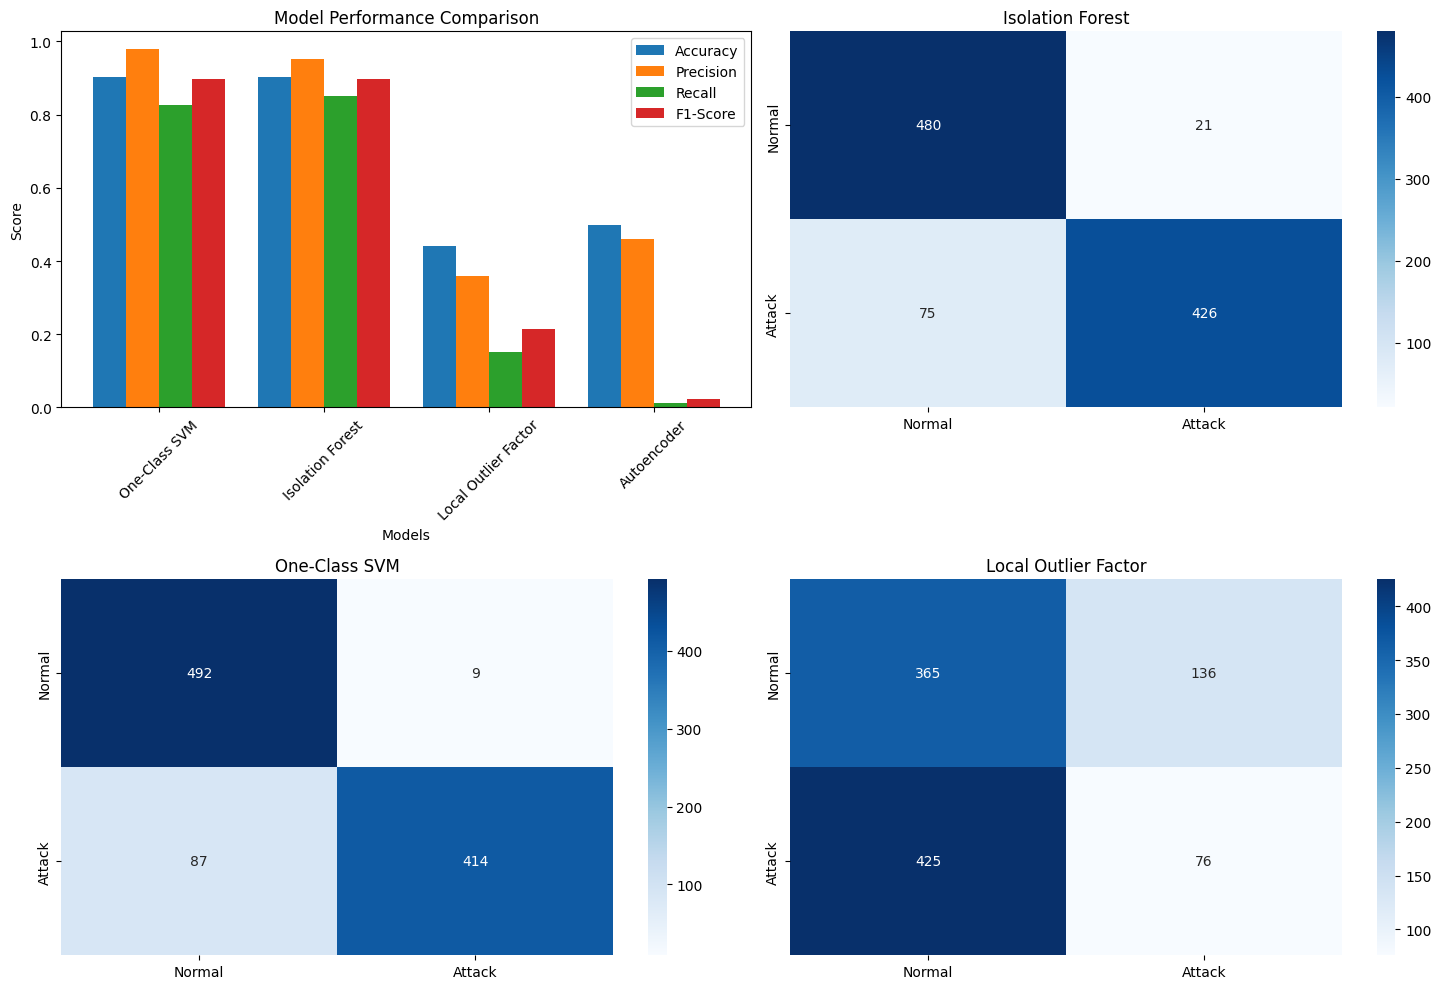

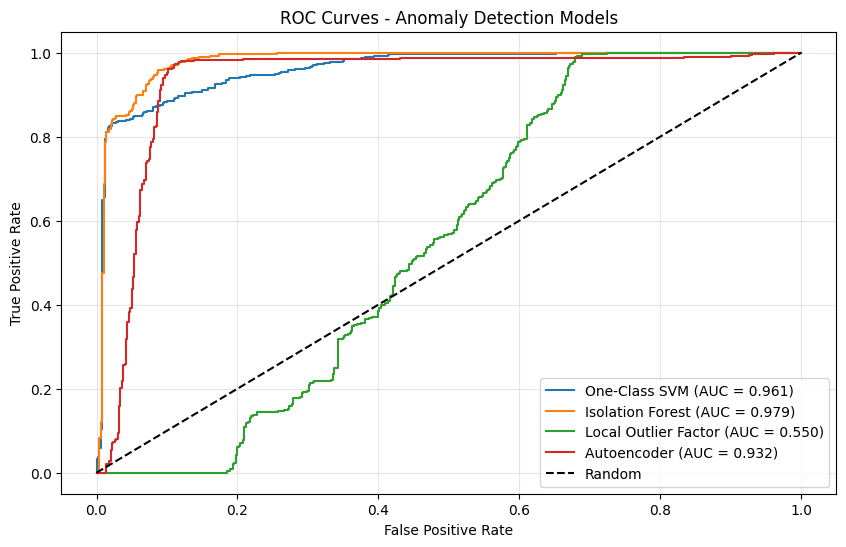


Best Model: Isolation Forest (F1-Score: 0.8987)
Results saved to: /content/drive/MyDrive/FYP/test_results.csv


In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
import json

# Load test dataset (specify your actual file name)
test_file = '/content/drive/MyDrive/FYP/test_dataset.csv'  # Update with actual filename
test_df = pd.read_csv(test_file)

print(f"Test dataset shape: {test_df.shape}")
print(f"Test dataset columns: {list(test_df.columns)}")

# Load model parameters and features
with open('/content/drive/MyDrive/FYP/trained_models_params.json', 'r') as f:
    model_params = json.load(f)

features = model_params['features_used']

# Check if label column exists
if 'attack' in test_df.columns:
    y_test = test_df['attack']
    print(f"Test labels distribution:\n{y_test.value_counts()}")
elif 'Attack' in test_df.columns:
    y_test = test_df['Attack']
    print(f"Test labels distribution:\n{y_test.value_counts()}")
elif 'attack_type' in test_df.columns:
    y_test = test_df['attack_type']
    print(f"Test labels distribution:\n{y_test.value_counts()}")
else:
    # Use last column as label
    y_test = test_df.iloc[:, -1]
    print(f"Using last column as label. Distribution:\n{y_test.value_counts()}")

# Apply same feature engineering as training data
test_df_engineered = test_df.copy()

# Handle categorical variables
from sklearn.preprocessing import LabelEncoder
categorical_cols = test_df.select_dtypes(include=['object']).columns.tolist()
exclude_cols = ['attack', 'attack_type', 'Attack']
categorical_cols = [col for col in categorical_cols if col not in exclude_cols]

for col in categorical_cols:
    le = LabelEncoder()
    test_df_engineered[col + '_encoded'] = le.fit_transform(test_df_engineered[col].astype(str))

# Network flow ratio features
if 'fwd_pkts_tot' in test_df.columns and 'bwd_pkts_tot' in test_df.columns:
    test_df_engineered['fwd_bwd_pkt_ratio'] = test_df_engineered['fwd_pkts_tot'] / (test_df_engineered['bwd_pkts_tot'] + 1)
    test_df_engineered['total_packets'] = test_df_engineered['fwd_pkts_tot'] + test_df_engineered['bwd_pkts_tot']

# Header size features
if 'fwd_header_size_tot' in test_df.columns and 'bwd_header_size_tot' in test_df.columns:
    test_df_engineered['header_size_ratio'] = test_df_engineered['fwd_header_size_tot'] / (test_df_engineered['bwd_header_size_tot'] + 1)
    test_df_engineered['total_header_size'] = test_df_engineered['fwd_header_size_tot'] + test_df_engineered['bwd_header_size_tot']

# Log transformations for numerical columns
numerical_cols = test_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
exclude_cols = ['attack', 'attack_type', 'Attack']
numerical_cols = [col for col in numerical_cols if col not in exclude_cols]

for col in numerical_cols:
    if test_df_engineered[col].min() > 0:
        test_df_engineered[col + '_log'] = np.log1p(test_df_engineered[col])

# Use only features that exist in both datasets
available_features = [f for f in features if f in test_df_engineered.columns]
missing_features = [f for f in features if f not in test_df_engineered.columns]
print(f"Using {len(available_features)} out of {len(features)} features")
print(f"Missing features: {missing_features}")

# Update features list to match available features
features = available_features

# Prepare test data
X_test = test_df_engineered[features].fillna(0)

# Convert to binary labels (0: normal, 1: attack)
# If 'Attack' column contains 1/0 or True/False, use directly
if y_test.dtype in ['int64', 'bool'] or set(y_test.unique()) <= {0, 1, True, False}:
    y_test_binary = y_test.astype(int)
else:
    # If text labels, convert (benign=0, attack=1)
    normal_labels = ['BENIGN', 'benign', 'normal', 'Normal', '0', 0, False]
    y_test_binary = (~y_test.isin(normal_labels)).astype(int)

print(f"Binary test labels - Normal: {(y_test_binary==0).sum()}, Attack: {(y_test_binary==1).sum()}")

# Load original training data to retrain models
train_df = pd.read_csv('/content/drive/MyDrive/FYP/engineered_dataset.csv')
X_train_full = train_df[features].fillna(0)  # Use updated features list

# Check for correct label column in training data
if 'attack' in train_df.columns:
    y_train_full = train_df['attack']
elif 'Attack' in train_df.columns:
    y_train_full = train_df['Attack']
elif 'label' in train_df.columns:
    y_train_full = train_df['label']
else:
    y_train_full = train_df.iloc[:, -1]

# Extract normal training data (benign only)
if y_train_full.dtype == 'object':
    normal_mask = y_train_full.str.lower() == 'benign'
else:
    normal_mask = y_train_full == 0

X_train_normal = X_train_full[normal_mask]

# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_normal)
X_test_scaled = scaler.transform(X_test)

print(f"Training on {len(X_train_scaled)} normal samples")

# Retrain models with same parameters
print("\nRetraining models...")

# 1. One-Class SVM
oc_svm = OneClassSVM(**model_params['one_class_svm'])
oc_svm.fit(X_train_scaled)
svm_pred = oc_svm.predict(X_test_scaled)
svm_pred_binary = (svm_pred == -1).astype(int)

# 2. Isolation Forest
iso_forest = IsolationForest(**model_params['isolation_forest'])
iso_forest.fit(X_train_scaled)
iso_pred = iso_forest.predict(X_test_scaled)
iso_pred_binary = (iso_pred == -1).astype(int)

# 3. Local Outlier Factor
lof = LocalOutlierFactor(**model_params['lof'])
lof.fit(X_train_scaled)
lof_pred = lof.predict(X_test_scaled)
lof_pred_binary = (lof_pred == -1).astype(int)

# 4. Autoencoder
input_dim = X_train_scaled.shape[1]
encoding_dim = max(8, input_dim // 3)

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation='relu')(input_layer)
encoder = Dense(encoding_dim // 2, activation='relu')(encoder)
decoder = Dense(encoding_dim, activation='relu')(encoder)
decoder = Dense(input_dim, activation='linear')(decoder)

autoencoder = Model(input_layer, decoder)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
autoencoder.fit(X_train_scaled, X_train_scaled, epochs=50, batch_size=32, verbose=0)

X_test_pred = autoencoder.predict(X_test_scaled, verbose=0)
test_mse = np.mean(np.power(X_test_scaled - X_test_pred, 2), axis=1)
threshold = model_params['autoencoder']['threshold']
ae_pred_binary = (test_mse > threshold).astype(int)

# Evaluation
models = {
    'One-Class SVM': svm_pred_binary,
    'Isolation Forest': iso_pred_binary,
    'Local Outlier Factor': lof_pred_binary,
    'Autoencoder': ae_pred_binary
}

print("\n" + "="*60)
print("MODEL PERFORMANCE EVALUATION")
print("="*60)

results = []
for name, predictions in models.items():
    accuracy = accuracy_score(y_test_binary, predictions)
    precision = precision_score(y_test_binary, predictions)
    recall = recall_score(y_test_binary, predictions)
    f1 = f1_score(y_test_binary, predictions)

    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })

    print(f"\n{name}:")
    print(classification_report(y_test_binary, predictions, target_names=['Normal', 'Attack']))

# Results summary
results_df = pd.DataFrame(results)
print("\nSUMMARY:")
print(results_df.round(4))

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Performance metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
x = np.arange(len(results_df))
width = 0.2

for i, metric in enumerate(metrics):
    axes[0, 0].bar(x + i*width, results_df[metric], width, label=metric)

axes[0, 0].set_xlabel('Models')
axes[0, 0].set_ylabel('Score')
axes[0, 0].set_title('Model Performance Comparison')
axes[0, 0].set_xticks(x + width * 1.5)
axes[0, 0].set_xticklabels(results_df['Model'], rotation=45)
axes[0, 0].legend()

# Confusion matrices for best 3 models
best_models = results_df.nlargest(3, 'F1-Score')['Model'].values

for i, model_name in enumerate(best_models):
    if i >= 3:
        break
    row = (i + 1) // 2
    col = (i + 1) % 2

    cm = confusion_matrix(y_test_binary, models[model_name])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Normal', 'Attack'],
                yticklabels=['Normal', 'Attack'],
                ax=axes[row, col])
    axes[row, col].set_title(f'{model_name}')

plt.tight_layout()
plt.show()

# ROC Curves
plt.figure(figsize=(10, 6))

scores = {
    'One-Class SVM': -oc_svm.decision_function(X_test_scaled),
    'Isolation Forest': -iso_forest.decision_function(X_test_scaled),
    'Local Outlier Factor': -lof.decision_function(X_test_scaled),
    'Autoencoder': test_mse
}

for name, score in scores.items():
    fpr, tpr, _ = roc_curve(y_test_binary, score)
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.3f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Anomaly Detection Models')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Best model
best_model = results_df.loc[results_df['F1-Score'].idxmax()]
print(f"\nBest Model: {best_model['Model']} (F1-Score: {best_model['F1-Score']:.4f})")

# Save results
results_df.to_csv('/content/drive/MyDrive/FYP/test_results.csv', index=False)
print("Results saved to: /content/drive/MyDrive/FYP/test_results.csv")